In [1]:
import os, sys
import plac
import shutil
import warnings
import datetime
import numpy as np
import pandas as pd
from time import time
from astropy import wcs
import concurrent.futures
from dateutil import parser
from astropy.io import fits
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
from astropy.coordinates import SkyCoord
from astropy.stats import sigma_clipped_stats as scs
warnings.simplefilter('ignore')
import seaborn as sns

In [2]:
from scipy.stats import gaussian_kde

In [3]:
df = pd.read_csv("n6.csv")

odf = pd.read_csv("N6752_all_v4.csv")

In [4]:
sns.set(style="whitegrid", font_scale=3, rc={'ytick.left': True,
                                             'xtick.bottom': True
                                               })


In [5]:
pmdf = odf[["pmra", "pmdec"]]

pmdf.dropna(inplace=True)

In [6]:
x = pmdf["pmra"].values
y = pmdf["pmdec"].values

xy = np.vstack([x,y])

z1 = gaussian_kde(xy)
z = z1(xy)

In [7]:
from matplotlib.ticker import AutoMinorLocator

In [10]:
from matplotlib.lines import Line2D

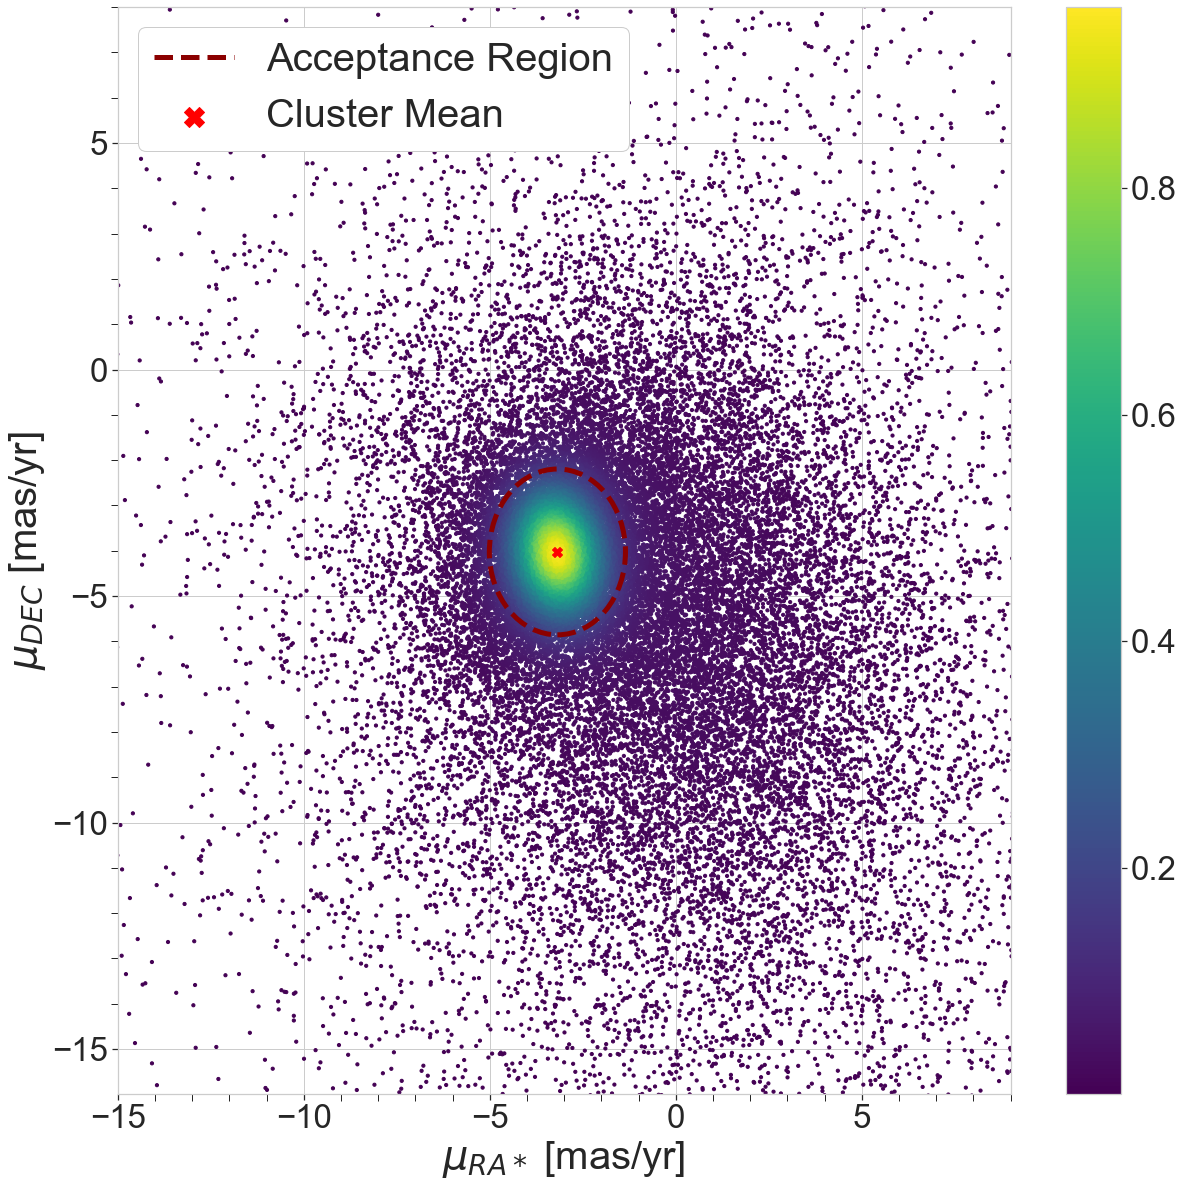

In [20]:
plt.figure(figsize=(20,20))

plt.scatter(pmdf["pmra"], pmdf["pmdec"], s=10, c=z*9, cmap="viridis", label=None)

plt.colorbar()

ax=plt.gca()

ax.set_ylim(-16,8)
ax.set_xlim(-15,9)

circle1 = plt.Circle((-3.18, -4.027,), 1.83, facecolor=None, edgecolor='darkred', fill=False, lw=5, ls="--", label="Acceptance Region")
a= ax.add_artist(circle1)

b= plt.scatter(-3.188, -4.03, s=100, marker="X", c="red", label="Cluster Mean")

line3 = Line2D(range(1), range(1),color="darkred", lw=5, ls="--")
ax.legend([line3, b], ['Acceptance Region', 'Cluster Mean'], markerscale=2, fontsize=40, loc=2, fancybox=True, framealpha=1 )


plt.ylabel(r"$\mu_{DEC}$ [mas/yr]", fontsize=40)
plt.xlabel(r"$\mu_{RA*}$ [mas/yr]", fontsize=40)
#plt.title("Proper Motion in RA vs DEC", fontsize = 45,  pad=15)


ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='minor', length=7)

plt.savefig("PM.tiff", dpi=500)
plt.show()
plt.close()


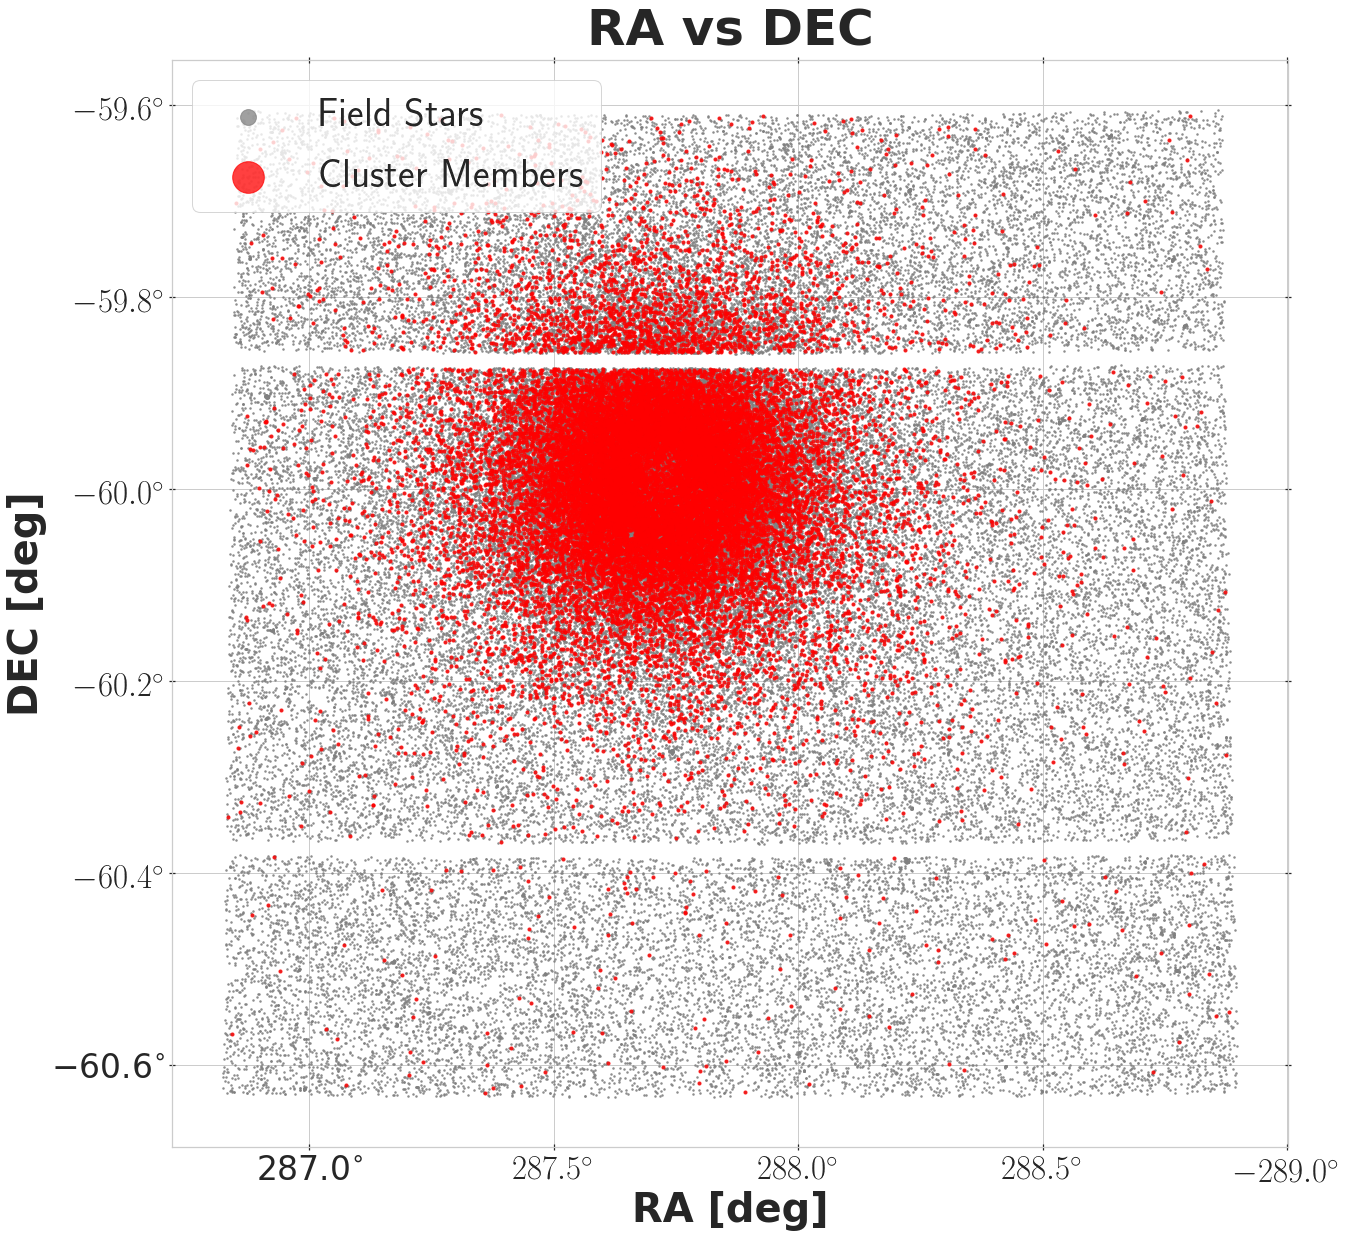

In [9]:
fig, ax =  plt.subplots(1, 1, figsize=(20, 20), sharey=True)

plt.rc('text', usetex=True)

#fig.subplots_adjust(wspace=0.15, top = 0.91 ,left=0.05, right=0.95,)

ax.scatter(odf["RA"], odf["DEC"], s=10, c= "grey", label="Field Stars", alpha=0.75, marker='.', edgecolors=None)
ax.scatter(df["RA"], df["DEC"], s=10, c="red", label="Cluster Members", alpha=0.75)

ax.set_yticklabels(['$-60.8^{\circ}$', '$-60.6^{\circ}$', '$-60.4^{\circ}$',
                    '$-60.2^{\circ}$', '$-60.0^{\circ}$', '$-59.8^{\circ}$',
                    '$-59.6^{\circ}$' ]
                  )

ax.set_xticklabels(['$286.5^{\circ}$', '$287.0^{\circ}$', '$287.5^{\circ}$',
                    '$288.0^{\circ}$', '$288.5^{\circ}$', '$-289.0^{\circ}$']
                  )

ax.xaxis.set_tick_params(top=True, direction ='inout')
ax.yaxis.set_tick_params(right=True, direction ='inout')

ax.set_ylabel(r'DEC [deg]', fontdict={"fontsize":40, "weight":"bold"})
ax.set_xlabel(r'RA [deg]', fontdict={"fontsize":40, "weight":"bold"})

ax.legend(markerscale=10, loc=2, fontsize=40, fancybox=True, framealpha=0.8)

ax.set_title("RA vs DEC", {"fontsize":50, "weight":"bold"}, pad=15)
#fig.suptitle("FIELD OF VIEW")
#fig.savefig("RA_DEC.tiff", dpi=400)

plt.show()
plt.close()